# TIC-TAC-TOE

- Tic-tac-toe (or noughts and crosses) is a simple strategy game in which two players take turns placing a mark on a 3x3 board, attempting to make a row, column, or diagonal of three with their mark.
- In this homework, we will use the tools we've covered in the past two weeks to create a tic-tac-toe simulator, and evaluate basic winning strategies.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

## EXERCISE 1

Instructions:
- For our tic-tac-toe board, we will use a numpy array with
  dimension 3 by 3. Make a function create_board() that creates
  such a board, with values of integers 0.
- Call create_board(), and store this as board.
  
[#numpy](), [#init](), [#zero]()

In [3]:

# let's make DIM_BOARD a GLOBAL constance since it will be used
# latter in this homework. LEGB allows us to do so.
DIM_BOARD = 3

In [4]:
def create_board():
    return(np.zeros((DIM_BOARD, DIM_BOARD), dtype=int))

In [5]:
board = create_board()
print(board)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


## EXERCISE 2

Instructions:
- Players 1 and 2 will take turns changing values of this
  array from a 0 to a 1 or 2, indicating the number of the
  player who places there. Create a function place(board,
  player, position) with player being the current player
  (an integer 1 or 2), and position a tuple of length 2
  specifying a desired location to place their marker.
  Only allow the current player to place a piece on the board
  (change the board position to their number)
  if that position is empty (zero).
- Use create_board() to store a board as board, and use place
  to have Player 1 place a piece on spot (0, 0).

In [6]:
def place(board, player, position):
    if board[position] == 0:
        board[position] = player
    else:
        print("Move not allowed at position ", position)

In [9]:
place(board, 1, (0,0))
print(board)

Move not allowed at position  (0, 0)
[[1 0 0]
 [0 0 0]
 [0 0 0]]


## EXERCISE 3

Instructions:
- Create a function possibilities(board) that returns a list of
  all positions (tuples) on the board that are not occupied (0).
  (Hint: numpy.where is a handy function that returns a
  list of indexes that meet a condition.)
- board is already defined from previous exercises.
  Call possibilities(board) to see what it returns!

[#numpy](), [#where](), [#zip]()

### Solution 1

In [10]:
def possibilities(board):
    # Let's PACK the tuple of 2 arrays returned by np.where:
    (ind_row, ind_col) = np.where(board == 0)
    # defined the list to be returned w/ List Comprehension:
    list_free_pos = [(ind_row[i], ind_col[i]) for i in range(len(ind_row))]
    return(list_free_pos)

### Solution 2

In [18]:
def possibilities(board):
    (ind_row, ind_col) = np.where(board == 0)
    # defined the list to be returned w/ List Comprehension:
    list_free_pos = list(zip(ind_row, ind_col))
    return(list_free_pos)

In [19]:
print(possibilities(board))

[(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


## EXERCISE 4

Instructions:
- Write a function random_place(board, player) that places a marker
  for the current player at random among all the
  available positions (those currently set to 0).
- Find possible placements with possibilities(board).
- Select one possible placement at random using random.choice(selection).
- board is already defined from previous exercises.
  Call random_place(board, player) to place a random
  marker for Player 2, and store this as board to update its value.

[#random](), [#choice]()

In [20]:
def random_place(board, player):
    selection = random.choice(possibilities(board))
    place(board, player, selection)
    return(board)

In [21]:
board = random_place(board, 2)
print(board)

[[1 0 0]
 [2 0 0]
 [0 0 0]]


## EXERCISE 5

Instructions:
- board is already defined from previous exercises.
  Use random_place(board, player) to place three pieces on board
  each for players 1 and 2.
- Print board to see your result.

In [22]:
for i in range(3):
    for player in [1, 2]:
        board = random_place(board, player)
print(board)

[[1 0 1]
 [2 1 2]
 [1 2 2]]


## EXERCISE 6

Instructions:
- Now that players may place their pieces, how will they know they've won?
  Make a function row_win(board, player) that takes the player (integer),
  and determines if any row consists of only their marker.
  Have it return True if this condition is met, and False otherwise.
- board is already defined from previous exercises.
  Call row_win to check if Player 1 has a complete row.

[#numpy](), [#all](), [#row]()

In [23]:
def row_win(board, player):
    for i in range(DIM_BOARD):
        if np.all(board[i] == player):
            return(True)
    return(False)

In [25]:
row_win(board, 1)

False

## EXERCISE 7

Instructions:
- Create a similar function col_win(board, player) that takes
  the player (integer), and determines if any column consists of only
  their marker. Have it return True if this condition is met,
  and False otherwise.
- board is already defined from previous exercises. Call col_win to check
  if Player 1 has a complete column.

[#numpy](), [#all](), [#column](), [#transpose]()

In [24]:
def col_win(board, player):
    for i in range(DIM_BOARD):
        if np.all(np.transpose(board)[i] == player):
            return(True)
    return(False)

In [26]:
col_win(board, 1)

False

## EXERCISE 8

Instructions:
- Finally, create a function diag_win(board, player) that tests if either
  diagonal of the board consists of only their marker.
  Have it return True if this condition is met, and False otherwise.
- board is already defined from previous exercises.
  Call diag_win to check if Player 1 has a complete diagonal.

[#numpy](), [#all](), [#diagonal](), [#diag](), [#fliplr]()

In [27]:
def diag_win(board, player):
    diag1 = np.diag(board)
    diag2 = np.diag(np.fliplr(np.transpose(board)))
    return((np.all(diag1 == player) or np.all(diag2 == player)))

In [28]:
diag_win(board, 1)

True

## EXERCISE 9

Instructions:
* Create a function evaluate(board) that uses row_win, col_win,
  and diag_win functions for both players. If one of them has won,
  return that player's number. If the board is full but no one has won,
  return -1. Otherwise, return 0.
* board is already defined from previous exercises. Call evaluate to see
  if either player has won the game yet.

In [29]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        # Check if `row_win`, `col_win`, or `diag_win` apply.
        # if so, store `player` as `winner`.
        if (row_win(board, player) or \
            col_win(board, player) or \
            diag_win(board, player)):
            winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

In [30]:
evaluate(board)

1

## EXERCISE 10

Instructions:
- create_board(), random_place(board, player), and evaluate(board)
  have been created from previous exercises. Create a function play_game()
  that creates a board, calls alternates between two players
  (beginning with Player 1), and evaluates the board for a winner after
  every placement. Play the game until one player wins (returning 1 or 2
  to reflect the winning player), or the game is a draw (returning -1).
- Call play_game once.

In [31]:
def play_game():
    # init game
    board = create_board()
    # print(board)
    winner = 0
    while winner == 0:
        for player in [1, 2]:
            random_place(board, player)
            winner = evaluate(board)
            # print(board)
            if winner != 0:
                break
    # return(winner, board)
    return(winner)

In [32]:
play_game()

1

## EXERCISE 11

Instructions:
- Use the play_game() function to play 1,000 random games, where
  Player 1 always goes first.
- When doing this, import and use the time library to call the time
  function both before and after playing all 1,000 games in order
  to evaluate how long this takes per game. Print your answer.
- The library matplotlib.pyplot has already been stored as plt.
  Use plt.hist and plt.show to plot a histogram of the results.
  Does Player 1 win more than Player 2? Does either player win more
  than each player draws?

[#matplotlib](), [#hist]()

0.0005066101551055908


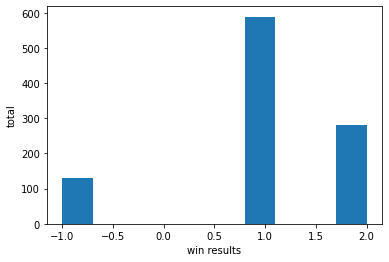

In [33]:
wins = []
start_time = time.time()
for i in range(1000):
    wins.append(play_game())
end_time = time.time()
print((end_time - start_time) / 1000)
plt.hist(wins)
plt.xlabel("win results")
plt.ylabel("total")
plt.show()


- We see that Player 1 wins more than Player 2, and the game sometimes ends in draws. 
- The total amount of time taken is about a few seconds, but will vary from machine to machine.

## EXERCISE 12

Instructions:
- This result is expected --- when guessing at random, it's better to go
  first. Let's see if Player 1 can improve their strategy. create_board(),
  random_place(board, player), and evaluate(board) have been created from
  previous exercises. Create a function play_strategic_game(), where
  Player 1 always starts with the middle square, and otherwise both
  players place their markers randomly.
- Call play_strategic_game once.

In [34]:
def play_strategic_game():
    board, winner = create_board(), 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            random_place(board, player)
            winner = evaluate(board)
            if winner != 0:
                break
    return winner

play_strategic_game()

1

## EXERCISE 13

Instructions:
- The results from Exercise 12 have been stored.
  Use the play_strategic_game() function to play 1,000 random games.
- Use the time libary to evaluate how long all these games takes.
- The library matplotlib.pyplot has already been stored as plt.
  Use plt.hist and plt.show to plot your results. Did Player 1's
  performance improve? Does either player win more than each player draws?

0.00044101643562316896


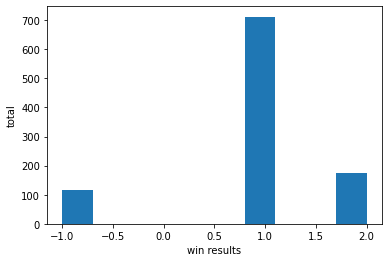

In [35]:
wins = []
start_time = time.time()
for i in range(1000):
    wins.append(play_strategic_game())

end_time = time.time()

print((end_time - start_time) / 1000)

plt.hist(wins)
plt.xlabel("win results")
plt.ylabel("total")
plt.show()

- Great work! Yes, starting in the middle square is a large advantage when play is otherwise random. 
- Also, each game takes less time to play, because each victory is decided earlier. Player 1 wins much more than
Player 2, and draws are less common.